In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataset= pd.read_excel('/content/product.xlsx')
dataset

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,18.01,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,18.02,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,18.03,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,2.10,Y,Y,N


Removing Unnecessary Columns

In [ ]:
dataset.columns

Index(['product_id', 'product_group', 'product_category', 'product_type',
       'product', 'product_description', 'unit_of_measure',
       'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn'],
      dtype='object')

In [ ]:
subset=dataset[['product_id', 'product_group', 'product_category', 'product_type',
       'product',
       'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn'
        ]]
subset

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.40,18.00,Y
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.40,18.00,Y
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.80,18.01,Y
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,16.36,18.02,Y
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,12.00,18.03,Y
...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,0.04,0.80,Y
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,1.20,6.00,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,0.60,3.00,Y
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,0.42,2.10,Y


Checking for unique values

```

```



In [ ]:
subset.nunique()

product_id                 88
product_group               5
product_category            9
product_type               31
product                    88
current_wholesale_price    49
current_retail_price       44
tax_exempt_yn               2
dtype: int64

Checking for Null Values

In [ ]:
subset.isnull().sum()

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
dtype: int64

Checking Outliers

<AxesSubplot:xlabel='product_category', ylabel='current_wholesale_price'>

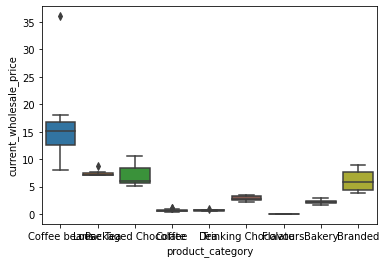

In [ ]:
sns.boxplot(x='product_category',y='current_wholesale_price',data= subset)

<AxesSubplot:xlabel='product_category', ylabel='current_retail_price'>

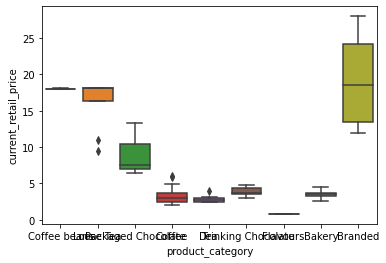

In [ ]:
sns.boxplot(x='product_category',y='current_retail_price',data= subset)

Removing Outliers

In [ ]:
upperlimit= subset['current_retail_price'].mean() + 3*subset['current_retail_price'].std()
lowerlimit= subset['current_retail_price'].mean() - 3*subset['current_retail_price'].std()
print(upperlimit)
print(lowerlimit)

26.783608326452804
-12.92497196281644


In [ ]:
new_subset= subset.loc[(subset['current_retail_price']< upperlimit)|(subset['current_retail_price']> lowerlimit)]
new_subset
                                                                     

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.40,18.00,Y
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.40,18.00,Y
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.80,18.01,Y
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,16.36,18.02,Y
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,12.00,18.03,Y
...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,0.04,0.80,Y
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,1.20,6.00,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,0.60,3.00,Y
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,0.42,2.10,Y


Scatter Plot

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_wholesale_price', ylabel='Density'>

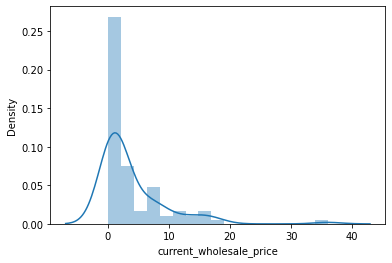

In [ ]:
sns.distplot(new_subset['current_wholesale_price'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_retail_price', ylabel='Density'>

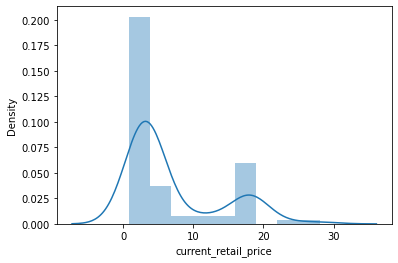

In [ ]:
sns.distplot(new_subset['current_retail_price'])

CATPLOT

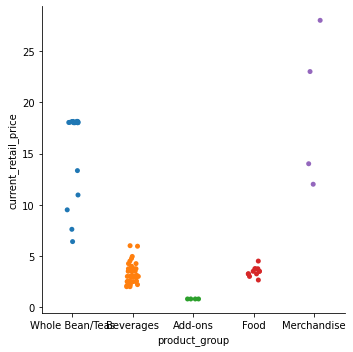

In [ ]:
sns.catplot(x="product_group", y="current_retail_price",
                data=new_subset)

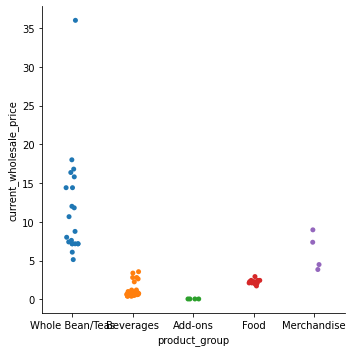

In [ ]:
sns.catplot(x="product_group", y="current_wholesale_price",
                data=new_subset)

In [ ]:
new_subset.to_excel('/content/new_product.xlsx')